In [2]:
from __future__ import division
#import numpy
#import matplotlib.pyplot as pyplot
import plotly.plotly as plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot_mpl
init_notebook_mode(connected=True)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\User\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy



Look at how polarization spectroscopy is used to lock the 852nm laser to the $6^2S_{1/2} |F=4\rangle \rightarrow 6P_{3/2} |F'=5\rangle$ transition in Cs.

Trace output to oscilloscope is $(left\ detector - right\ detector)$. This gives the anisotropy in the transmission of the different polarizations. The $|F=4\rangle \rightarrow |F'=5\rangle$ transition has the greatest anisotropy so is the 'largest' feature on the trace.

### Importing .csv Data

Each file has 2 columns (time and amplitude) and 5 header rows of information that need to be ignored when importing. Can do this using `numpy.genfromtxt`. The filenames are of the form `[waveform number][file_name]00000.csv` usually, although the last digit may vary.

In [30]:
folder = 'Scope121016\\'
trace = 'C2'
both = numpy.genfromtxt(folder+trace+'singlescan00000.csv', 
                        delimiter = ',', skip_header = 5)
left = numpy.genfromtxt(folder+trace+'singleleft00000.csv', 
                        delimiter = ',', skip_header = 5)
right = numpy.genfromtxt(folder+trace+'singleright00000.csv', 
                        delimiter = ',', skip_header = 5)
dark = numpy.genfromtxt(folder+trace+'dark00000.csv', 
                        delimiter = ',', skip_header = 5)

### Plotting Scope Traces

Plotting the scope trace from both detectors gives the anisotropy signal.

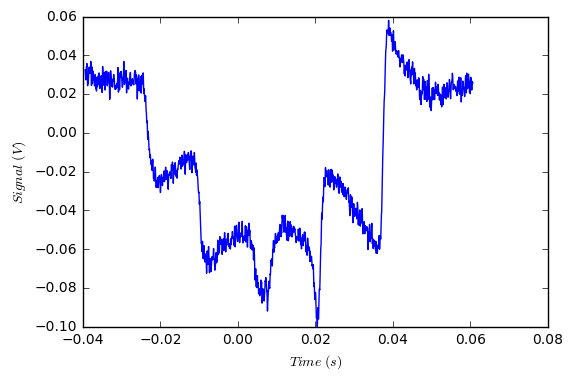

In [9]:
pyplot.figure()
pyplot.plot(both[:,0], both[:,1])
pyplot.xlabel(r'$Time\ (s)$')
pyplot.ylabel(r'$Signal\ (V)$')
pyplot.show()

We should be able to reproduce this trace by manually adding the signals from each detector. 
$\bullet both = l - r \\
\bullet left = l - r_0 \\
\bullet right = l_0 - r \\
\bullet dark = l_0 - r_0.$

Then the signal should be given by 
$both = left + right - dark$.

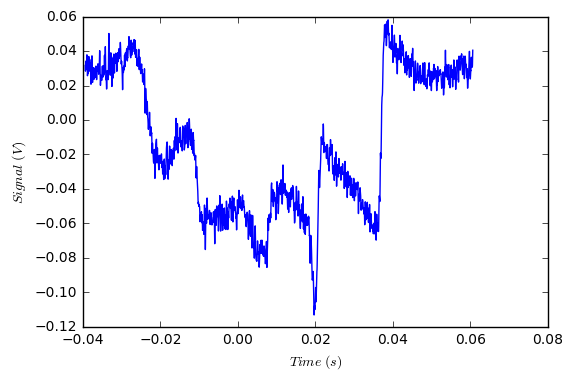

In [8]:
signal = left[:,1]+right[:,1]-dark[:,1]
pyplot.figure()
pyplot.plot(left[:,0],signal)
pyplot.xlabel(r'$Time\ (s)$')
pyplot.ylabel(r'$Signal\ (V)$')
pyplot.show()

Plotting the two traces on the same axes allows easy comparison.

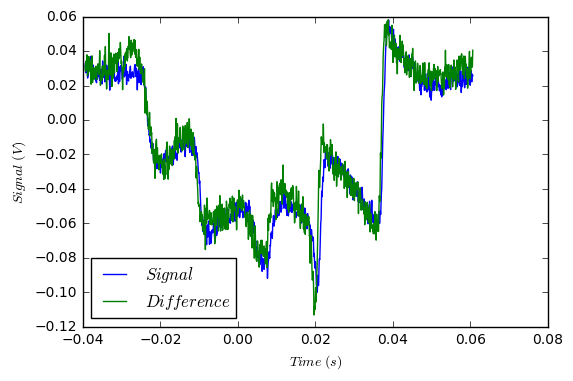

In [14]:
pyplot.figure()
pyplot.plot(both[:,0],both[:,1], label = r'$Signal$')
pyplot.plot(both[:,0], signal, label = r'$Difference$')
pyplot.xlabel(r'$Time\ (s)$')
pyplot.ylabel(r'$Signal\ (V)$')
pyplot.legend(loc=0)
pyplot.show()

As can be seen the traces agree. Without calibrating the x axis we can't relate the position of the features to the laser detuning. Plotting the signals from each detector individually we can see the transmission spectrum.

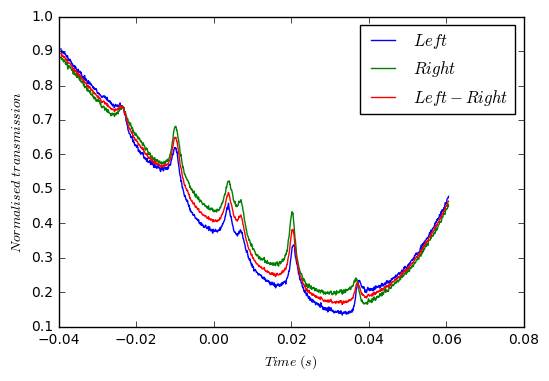

In [23]:
transmission = (left[:,1]-right[:,1])/2
pyplot.figure()
pyplot.plot(left[:,0],left[:,1],label = r'$Left$')
pyplot.plot(right[:,0], -right[:,1], label = r'$Right$')
pyplot.plot(right[:,0], transmission, label = r'$Left - Right$')
pyplot.legend(loc=0)
pyplot.xlabel(r'$Time\ (s)$')
pyplot.ylabel(r'$Normalised\ transmission$')
pyplot.show()

We can use the positions of these features, along with data from Steck, to 'calibrate' the x axis in frequency units. The spacing between the outermost features ($F'=3$ and $F'=5$) is $452\ \rm{MHz}$. Setting the detuning $\Delta = 0$ to be on resonance with the $F' = 5$ feature, we can use this to find which feature is the $F' = 4$ transition, and which correspond to crossover resonances.

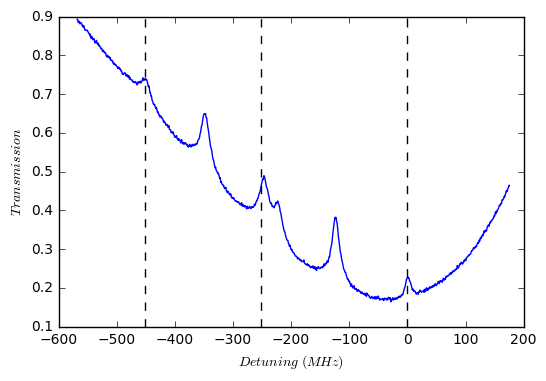

In [28]:
detuning = (right[:,0]-0.0370)/0.0608*452
pyplot.figure()
pyplot.plot(detuning,transmission)
pyplot.axvline(x=0, color='k', linestyle='dashed')
pyplot.axvline(x=-251, color='k', linestyle='dashed')
pyplot.axvline(x=-452, color='k', linestyle='dashed')
pyplot.xlabel(r'$Detuning\ (MHz)$')
pyplot.ylabel(r'$Transmission$')
pyplot.show()

With this calibration we can see the positions of the features in the anisotropy trace.

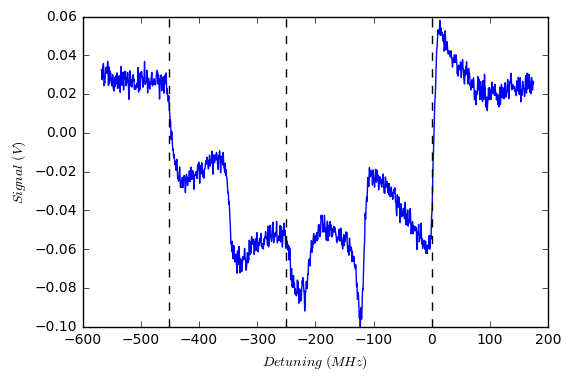

In [29]:
pyplot.figure()
pyplot.plot(detuning, both[:,1])
pyplot.axvline(x=0, color='k', linestyle='dashed')
pyplot.axvline(x=-251, color='k', linestyle='dashed')
pyplot.axvline(x=-452, color='k', linestyle='dashed')
pyplot.xlabel(r'$Detuning\ (MHz)$')
pyplot.ylabel(r'$Signal\ (V)$')
pyplot.show()

## 09/12/16

Took more data to average over and reduce noise.

In [4]:
folder = 'Scope091216\\'
trace = 'C3'
for i in range(10):
    globals()['both_'+str(i)] = numpy.genfromtxt(folder+trace+'both852'+'0000'
                                                 +str(i)+'.csv', delimiter = ',',
                                                 skip_header = 5, usecols=1)
    if i==0:
        both_all = both_0
    else:
        both_all = numpy.vstack((both_all,globals()['both_'+str(i)]))
time = numpy.genfromtxt(folder+trace+'both852'+'00000.csv', delimiter=',', 
                        skip_header=5, usecols=0)

In [5]:
both_avg = numpy.average(both_all, axis=0)

C:\Users\User\Anaconda2\lib\site-packages\matplotlib\figure.py:397: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



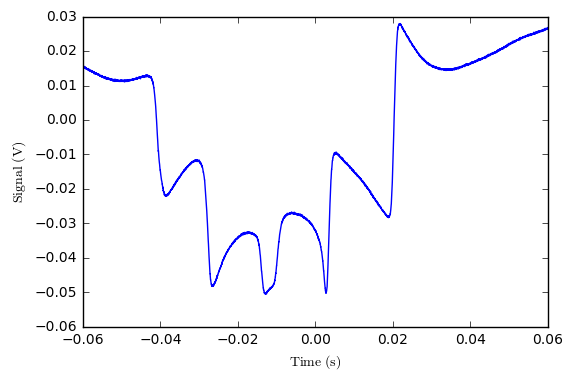

In [6]:
fig,ax = pyplot.subplots()
ax.plot(time, both_avg)
ax.set_xlim([-0.06,0.06])
ax.set_xlabel(r'$\rm{Time\ (s)}$')
ax.set_ylabel(r'$\rm{Signal\ (V)}$')
fig.show()
#pltly.iplot_mpl(fig)

Trace is now much smoother but thankfully retains the same shape!

In [7]:
for i in range(10):
    globals()['left_'+str(i)] = numpy.genfromtxt(folder+trace+'left852'+'0000'
                                                 +str(i)+'.csv', delimiter = ',',
                                                 skip_header = 5, usecols=1)
    globals()['right_'+str(i)] = numpy.genfromtxt(folder+trace+'right852'+'0000'
                                                 +str(i)+'.csv', delimiter = ',',
                                                 skip_header = 5, usecols=1)
    if i==0:
        left_all = left_0
        right_all = right_0
    else:
        left_all = numpy.vstack((left_all,globals()['left_'+str(i)]))
        right_all = numpy.vstack((right_all,globals()['right_'+str(i)]))

In [8]:
left_avg = numpy.average(left_all, axis=0)
right_avg = numpy.average(right_all, axis=0)

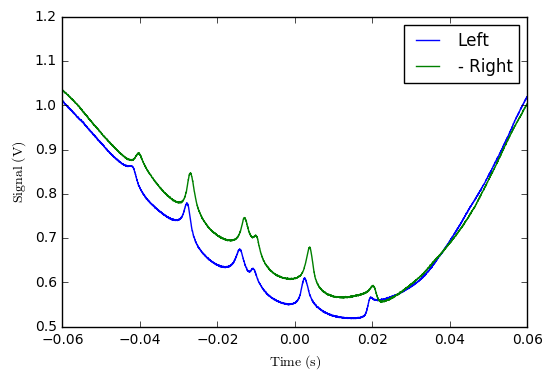

In [9]:
fig1 = pyplot.figure()
pyplot.plot(time, left_avg, label='Left')
pyplot.plot(time, -right_avg, label='- Right')
pyplot.xlim([-0.06,0.06])
pyplot.xlabel(r'$\rm{Time\ (s)}$')
pyplot.ylabel(r'$\rm{Signal\ (V)}$')
pyplot.legend()
fig1.show()

#pltly.iplot_mpl(fig1)

In [10]:
trans = (left_avg - right_avg)/2

In [11]:
fig2 = pyplot.figure()
pyplot.plot(time, trans)
pyplot.xlim([-0.06,0.06])
pyplot.xlabel(r'$\rm{Time\ (s)}$')
pyplot.ylabel(r'$\rm{Transmission\ (arb. units)}$')
url = plotly.iplot_mpl(fig2)
print url
#fig2.show()

<plotly.tools.PlotlyDisplay object>


Plotly's interactivity enables us to more accurately locate the positions of the features (without writing specific code to do so!). Now we see the positions of the extreme features are x =-0.041 and x = 0.020. From Steck, these features are separated by $452\ \rm{MHz}$. Setting zero detuning to be at the position of the $|F = 4\rangle\rightarrow|F' = 5\rangle$ feature we can rescale the axis to be detuning.

In [89]:
detuning_axis = (time-0.02)*452/(0.02+0.041)

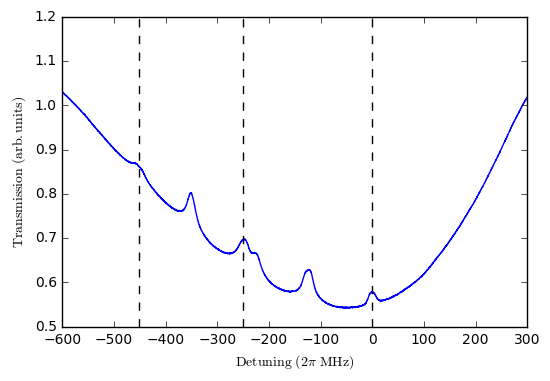

In [90]:
pyplot.figure()
pyplot.plot(detuning_axis, trans)
pyplot.xlim([-600,300])
pyplot.axvline(x=0, color='k', linestyle='dashed')
pyplot.axvline(x=-251, color='k', linestyle='dashed')
pyplot.axvline(x=-452, color='k', linestyle='dashed')
pyplot.xlabel(r'$\rm{Detuning\ (2\pi\ MHz)}$')
pyplot.ylabel(r'$\rm{Transmission\ (arb. units)}$')
pyplot.show()

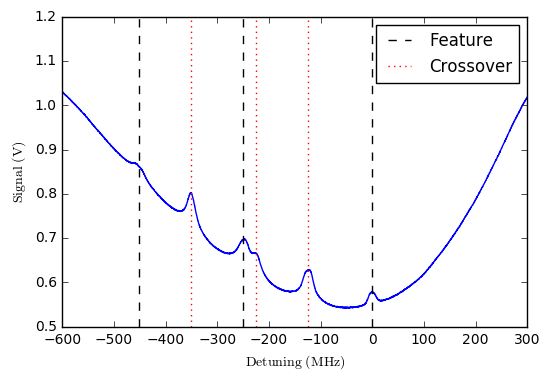

In [98]:
pyplot.figure()
pyplot.plot(detuning_axis, trans)#both_avg)
pyplot.xlim([-600,300])
pyplot.axvline(x=0, color='k', linestyle='dashed', label = 'Feature')
pyplot.axvline(x=-251, color='k', linestyle='dashed')
pyplot.axvline(x=-452, color='k', linestyle='dashed')
pyplot.axvline(x=-452/2, color='r', linestyle='dotted', label='Crossover')
pyplot.axvline(x=-251/2, color='r', linestyle='dotted')
pyplot.axvline(x=(-452-251)/2, color='r', linestyle='dotted')
pyplot.xlabel(r'$\rm{Detuning\ (MHz)}$')
pyplot.ylabel(r'$\rm{Signal\ (V)}$')
pyplot.legend(loc=0)
pyplot.show()

It is trivial to show that the other features correspond to crossover resonances  and are exactly mid-way between the main features.

In [102]:
from Inputs import get_data
no_pump = get_data(folder, 'C3', 'nopumpboth852', 10, False)

In [103]:
no_pump_avg = numpy.average(no_pump, axis=0)

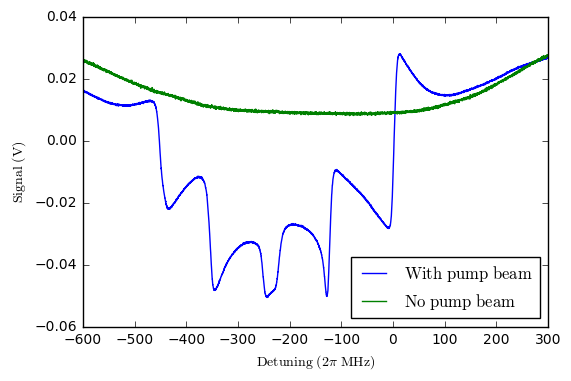

In [108]:
pyplot.figure()
pyplot.plot(detuning_axis, both_avg, label=r'$\rm{With\ pump\ beam}$')
pyplot.plot(detuning_axis, no_pump_avg, label=r'$\rm{No\ pump\ beam}$')
pyplot.xlim([-600,300])
pyplot.xlabel(r'$\rm{Detuning\ (2\pi\ MHz)}$')
pyplot.ylabel(r'$\rm{Signal\ (V)}$')
pyplot.legend(loc=0)
pyplot.show()

Without the pump beam we see the Doppler broadened resonance but no anisotropy. Maybe take separate left/right traces without pump to make transmission plot with zero background?